In [1]:
# Qualifying Importance Over Time in Formula 1

#This notebook analyzes how the importance of qualifying position in Formula 1
#has evolved over time. By measuring the statistical relationship between grid
#position and finishing position, the analysis evaluates whether race outcomes
#have become more predictable from qualifying performance.

#A stronger relationship indicates reduced overtaking opportunities and greater
#importance of qualifying, while a weaker relationship suggests higher race-day
#variability.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

race_data = pd.read_csv("../data/processed/race_data_clean.csv")

In [3]:
race_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,name_x,circuitId,forename,surname,nationality,name_y,grid_position
0,1,18,1,1,22,1,1,1,1,10.0,...,218.3,1,2008,Australian Grand Prix,1,Lewis,Hamilton,British,McLaren,1.0
1,2,18,2,2,3,5,2,2,2,8.0,...,217.586,1,2008,Australian Grand Prix,1,Nick,Heidfeld,German,BMW Sauber,5.0
2,3,18,3,3,7,7,3,3,3,6.0,...,216.719,1,2008,Australian Grand Prix,1,Nico,Rosberg,German,Williams,7.0
3,4,18,4,4,5,11,4,4,4,5.0,...,215.464,1,2008,Australian Grand Prix,1,Fernando,Alonso,Spanish,Renault,12.0
4,5,18,5,1,23,3,5,5,5,4.0,...,218.385,1,2008,Australian Grand Prix,1,Heikki,Kovalainen,Finnish,McLaren,3.0


In [4]:
qual_data = race_data[
    (race_data['grid_position'] > 0) &
    (race_data['position'] > 0)
].copy()

In [5]:
season_corr = (
    qual_data
    .groupby('year')[['grid_position', 'position']]
    .apply(lambda x: x['grid_position'].corr(x['position']))
    .reset_index(name='grid_finish_corr')
)

In [6]:
season_corr.head()

,year,grid_finish_corr
0,1994,0.736490
1,1995,0.729026
2,1996,0.739591
3,1997,0.647587
4,1998,0.735892


In [7]:
season_corr['rolling_corr_5y'] = (
    season_corr['grid_finish_corr']
    .rolling(window=5, center=True)
    .mean()
)

season_corr['rolling_corr_10y'] = (
    season_corr['grid_finish_corr']
    .rolling(window=10, center=True)
    .mean()
)

In [8]:
def era_label(year):
    if year < 1970:
        return "Early Era (1950–1969)"
    elif year < 1990:
        return "Turbo / Transition Era (1970–1989)"
    elif year < 2010:
        return "Refuelling Era (1990–2009)"
    elif year < 2022:
        return "Hybrid Era (2010–2021)"
    else:
        return "Ground Effect Era (2022–2025)"

season_corr['era'] = season_corr['year'].apply(era_label)

In [9]:
season_corr.head()

,year,grid_finish_corr,rolling_corr_5y,rolling_corr_10y,era
0,1994,0.736490,NaN,NaN,Refuelling Era (1990–2009)
1,1995,0.729026,NaN,NaN,Refuelling Era (1990–2009)
2,1996,0.739591,0.717717,NaN,Refuelling Era (1990–2009)
3,1997,0.647587,0.704990,NaN,Refuelling Era (1990–2009)
4,1998,0.735892,0.690683,NaN,Refuelling Era (1990–2009)


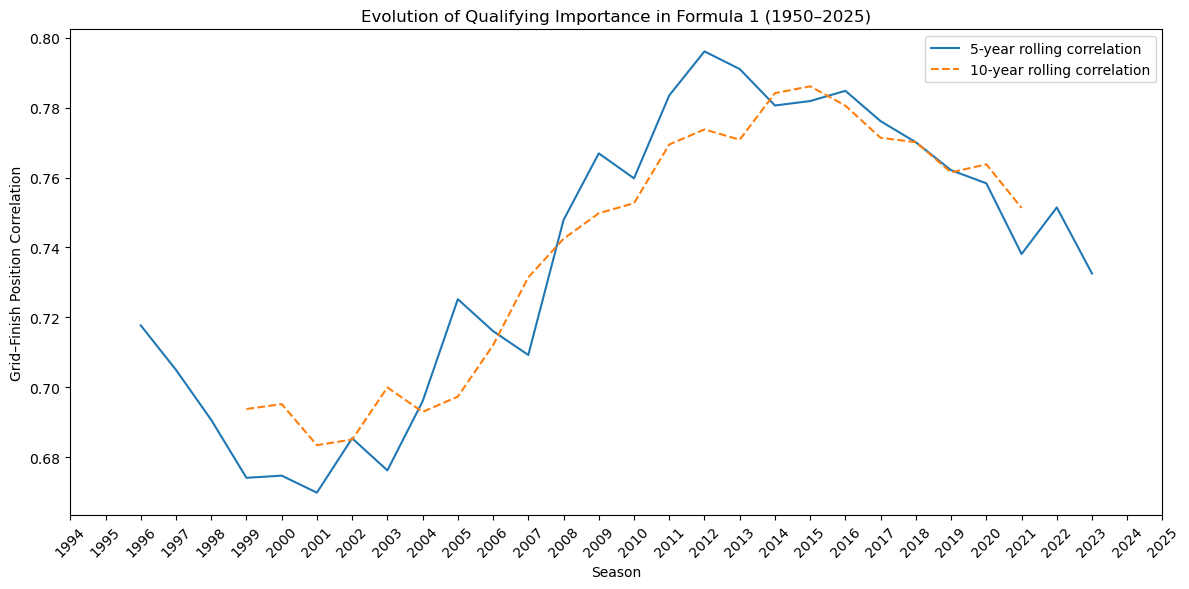

In [10]:
plt.figure(figsize=(12,6))

plt.plot(
    season_corr['year'],
    season_corr['rolling_corr_5y'],
    label='5-year rolling correlation'
)

plt.plot(
    season_corr['year'],
    season_corr['rolling_corr_10y'],
    linestyle='--',
    label='10-year rolling correlation'
)

plt.xlabel("Season")
plt.ylabel("Grid–Finish Position Correlation")
plt.title("Evolution of Qualifying Importance in Formula 1 (1950–2025)")
plt.legend()

years = season_corr['year'].astype(int).tolist()
plt.xticks(years, rotation=45)

plt.tight_layout()
plt.savefig(
    "../figures/figure_qualifying_importance_over_time.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [11]:
era_corr_summary = (
    season_corr
    .groupby('era')
    .agg(
        avg_corr=('grid_finish_corr', 'mean'),
        avg_5y_corr=('rolling_corr_5y', 'mean')
    )
    .reset_index()
)

era_corr_summary

,era,avg_corr,avg_5y_corr
0,Ground Effect Era (2022–2025),0.726000,0.742005
1,Hybrid Era (2010–2021),0.780763,0.773555
2,Refuelling Era (1990–2009),0.702173,0.703931


In [12]:
season_corr.to_csv(
    "../data/processed/qualifying_importance_over_time.csv",
    index=False
)

print("qualifying_importance_over_time.csv saved")

qualifying_importance_over_time.csv saved
